In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
### read the tab separated file containing healthcare provider data as a pandas DataFrame

Provider_PATH = 'Medicare_Provider_Util_Payment_PUF_CY2017/Medicare_Provider_Util_Payment_PUF_CY2017.txt'

provider_df = pd.read_csv(Provider_PATH, "\t")

print(provider_df.tail())




def load_provider_data(provider_path=Provider_PATH):
    provider_df = pd.read_csv(provider_path, "\t")
    return provider_df

                npi nppes_provider_last_org_name nppes_provider_first_name  \
9847439  1992999825                    DESCHENES                  GEOFFREY   
9847440  1992999874                        JOFFE                 GABRIELLA   
9847441  1992999874                        JOFFE                 GABRIELLA   
9847442  1992999874                        JOFFE                 GABRIELLA   
9847443  1992999874                        JOFFE                 GABRIELLA   

        nppes_provider_mi nppes_credentials nppes_provider_gender  \
9847439                 R              M.D.                     M   
9847440               NaN               NaN                     F   
9847441               NaN               NaN                     F   
9847442               NaN               NaN                     F   
9847443               NaN               NaN                     F   

        nppes_entity_code nppes_provider_street1 nppes_provider_street2  \
9847439                 I           1100 

In [3]:
convicted_df = pd.read_csv('LEIE.csv')
convicted_df.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
1,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
2,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
3,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN
4,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,19940524,0,0,NaN


In [4]:
provider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9847444 entries, 0 to 9847443
Data columns (total 26 columns):
npi                                 int64
nppes_provider_last_org_name        object
nppes_provider_first_name           object
nppes_provider_mi                   object
nppes_credentials                   object
nppes_provider_gender               object
nppes_entity_code                   object
nppes_provider_street1              object
nppes_provider_street2              object
nppes_provider_city                 object
nppes_provider_zip                  object
nppes_provider_state                object
nppes_provider_country              object
provider_type                       object
medicare_participation_indicator    object
place_of_service                    object
hcpcs_code                          object
hcpcs_description                   object
hcpcs_drug_indicator                object
line_srvc_cnt                       float64
bene_unique_cnt            

In [5]:
provider_df.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
count,9.847444e+06,9.847443e+06,9.847443e+06,9.847443e+06,9.847443e+06,9.847443e+06,9.847443e+06,9.847443e+06
mean,1.499839e+09,2.448553e+02,8.777250e+01,1.403349e+02,1.015993e+02,3.515861e+02,7.753480e+01,7.822188e+01
std,2.877164e+08,5.122602e+03,1.167731e+03,1.985972e+03,2.764955e+02,1.064216e+03,2.152963e+02,2.158862e+02
min,1.000000e+00,2.400000e+00,1.100000e+01,1.100000e+01,6.035380e-05,6.035380e-05,0.000000e+00,0.000000e+00
25%,1.255301e+09,2.100000e+01,1.700000e+01,2.000000e+01,2.426084e+01,5.800000e+01,1.928420e+01,2.009083e+01
50%,1.497985e+09,4.300000e+01,3.200000e+01,4.000000e+01,6.499769e+01,1.460000e+02,4.695941e+01,4.775953e+01
75%,1.740675e+09,1.170000e+02,7.500000e+01,1.060000e+02,1.135045e+02,3.000000e+02,8.519500e+01,8.525000e+01
max,1.993000e+09,7.195536e+06,7.928730e+05,1.504215e+06,5.668435e+04,9.999999e+04,4.443910e+04,4.443910e+04


In [6]:
convicted_df.describe()

,NPI,DOB,ZIP,EXCLDATE,REINDATE,WAIVERDATE
count,7.267600e+04,6.869100e+04,72676.000000,7.267600e+04,72676.0,7.267600e+04
mean,1.096020e+08,1.961971e+07,51420.786642,2.006805e+07,0.0,4.148421e+03
std,3.979338e+08,1.404949e+05,29593.928817,8.143594e+04,0.0,2.887307e+05
min,0.000000e+00,1.901010e+07,0.000000,1.977070e+07,0.0,0.000000e+00
25%,0.000000e+00,1.953032e+07,29918.000000,2.001052e+07,0.0,0.000000e+00
50%,0.000000e+00,1.962041e+07,45694.000000,2.007102e+07,0.0,0.000000e+00
75%,0.000000e+00,1.972050e+07,78416.000000,2.014052e+07,0.0,0.000000e+00
max,1.992979e+09,1.999043e+07,99927.000000,2.019122e+07,0.0,2.017062e+07


### Looking for null values. 

In [7]:
pd.isnull(provider_df).any()

npi                                 False
nppes_provider_last_org_name         True
nppes_provider_first_name            True
nppes_provider_mi                    True
nppes_credentials                    True
nppes_provider_gender                True
nppes_entity_code                    True
nppes_provider_street1               True
nppes_provider_street2               True
nppes_provider_city                  True
nppes_provider_zip                   True
nppes_provider_state                 True
nppes_provider_country               True
provider_type                        True
medicare_participation_indicator     True
place_of_service                     True
hcpcs_code                           True
hcpcs_description                    True
hcpcs_drug_indicator                 True
line_srvc_cnt                        True
bene_unique_cnt                      True
bene_day_srvc_cnt                    True
average_Medicare_allowed_amt         True
average_submitted_chrg_amt        

In [8]:
columns_provider = provider_df.columns ### gives the columns of the DF. .index will give the row index and 
### .values will give the values

columns_provider

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_Medicare_payment_amt',
       'average_Medicare_standard_amt'],
      dtype='object')

In [9]:
provider_df = provider_df[1:]  ### dropping the first instance which is not an NPI

### Performing Dimensionality Reduction

In [10]:
### selecting the important attributes/features and dropping missing values

selected_provider_data = provider_df[['npi', 'nppes_provider_gender', 'provider_type', 
                             'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt',
                             'average_submitted_chrg_amt', 'average_Medicare_allowed_amt', 
                             'average_Medicare_payment_amt']].dropna(axis=0)


In [11]:
### Removing the missing values from the selected features.
print(selected_provider_data['npi'].describe())


nadropped = selected_provider_data.dropna(axis=0)

print(nadropped['npi'].describe())



count    9.416125e+06
mean     1.499785e+09
std      2.877289e+08
min      1.003000e+09
25%      1.255302e+09
50%      1.497969e+09
75%      1.740681e+09
max      1.993000e+09
Name: npi, dtype: float64
count    9.416125e+06
mean     1.499785e+09
std      2.877289e+08
min      1.003000e+09
25%      1.255302e+09
50%      1.497969e+09
75%      1.740681e+09
max      1.993000e+09
Name: npi, dtype: float64


In [12]:
pd.isnull(nadropped).any() ### confirming if there are any missing values

npi                             False
nppes_provider_gender           False
provider_type                   False
line_srvc_cnt                   False
bene_unique_cnt                 False
bene_day_srvc_cnt               False
average_submitted_chrg_amt      False
average_Medicare_allowed_amt    False
average_Medicare_payment_amt    False
dtype: bool

In [13]:
convicted_df.columns

Index(['LASTNAME', 'FIRSTNAME', 'MIDNAME', 'BUSNAME', 'GENERAL', 'SPECIALTY',
       'UPIN', 'NPI', 'DOB', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'EXCLTYPE',
       'EXCLDATE', 'REINDATE', 'WAIVERDATE', 'WVRSTATE'],
      dtype='object')

In [14]:
selected_convicted_data = convicted_df[['NPI']].dropna(axis=0)

selected_convicted_data.describe()

,NPI
count,7.267600e+04
mean,1.096020e+08
std,3.979338e+08
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.992979e+09


### Joining the provider dataset with LEIE (convicted) labeled dataset.

In [15]:
merged_dataset = pd.merge(selected_provider_data, selected_convicted_data, 
                          how='right', left_on='npi', right_on='NPI').dropna(axis=0)

merged_dataset

,npi,nppes_provider_gender,provider_type,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt,NPI
0,1.003128e+09,M,Internal Medicine,617.0,499.0,617.0,332.463533,219.944716,170.918590,1003127655
1,1.003128e+09,M,Internal Medicine,249.0,17.0,249.0,69.899598,42.570080,33.024418,1003127655
2,1.003128e+09,M,Internal Medicine,1220.0,235.0,1220.0,120.000000,78.414213,61.340197,1003127655
3,1.003128e+09,M,Internal Medicine,754.0,434.0,754.0,172.590186,113.284987,88.611313,1003127655
4,1.003128e+09,M,Internal Medicine,543.0,448.0,543.0,188.176796,117.852320,91.907495,1003127655
...,...,...,...,...,...,...,...,...,...,...
1810,1.982676e+09,M,Emergency Medicine,265.0,67.0,265.0,125.000000,67.717925,43.902528,1982676136
1811,1.982676e+09,M,Emergency Medicine,24.0,24.0,24.0,165.000000,102.440000,34.667917,1982676136
1812,1.992768e+09,M,Family Practice,29.0,27.0,29.0,574.000000,65.900000,49.888276,1992768477
1813,1.992768e+09,M,Family Practice,32.0,32.0,32.0,757.000000,125.010000,92.168750,1992768477


,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt,NPI
count,1.815000e+03,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03
mean,1.529590e+09,258.408815,71.072176,146.446832,254.192434,99.720832,72.825212,1.529590e+09
std,2.792831e+08,1215.762687,106.159045,299.869515,917.186901,299.742333,234.570899,2.792831e+08
min,1.003128e+09,11.000000,11.000000,11.000000,0.468966,0.019024,0.013659,1.003128e+09
25%,1.306868e+09,25.000000,18.000000,24.000000,50.000000,24.601667,17.619372,1.306868e+09
50%,1.538186e+09,56.000000,34.000000,50.000000,134.052632,70.240000,46.861935,1.538186e+09
75%,1.780673e+09,160.000000,75.000000,136.500000,241.631579,114.695000,82.487157,1.780673e+09
max,1.992768e+09,26460.000000,1107.000000,4439.000000,23150.550000,7500.060000,5879.588571,1.992768e+09


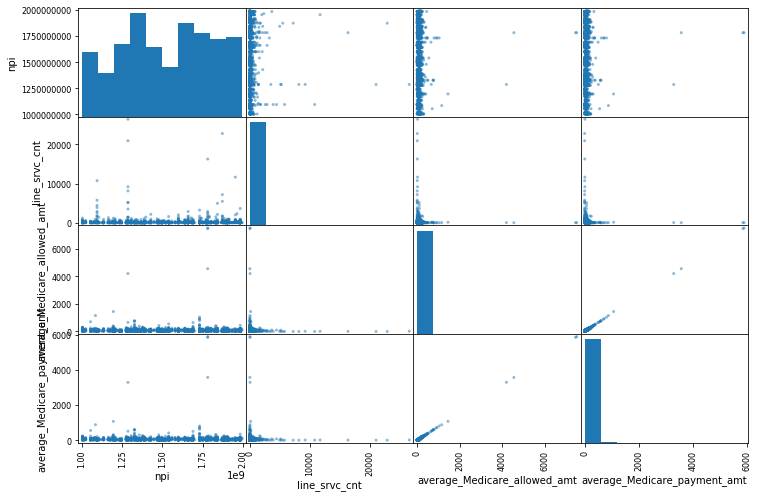

In [16]:
%matplotlib inline

from pandas.plotting import scatter_matrix

attributes = ["npi", "nppes_provider_gender", "line_srvc_cnt",
              "average_Medicare_allowed_amt", "average_Medicare_payment_amt"]
scatter_matrix(merged_dataset[attributes], figsize=(12, 8))

merged_dataset.describe()

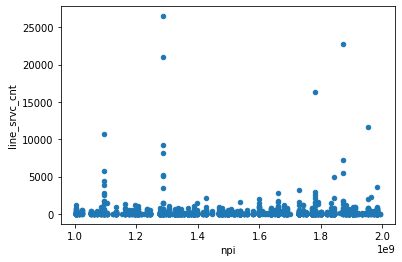

In [17]:
merged_dataset.plot(kind='scatter', x='npi', y='line_srvc_cnt')

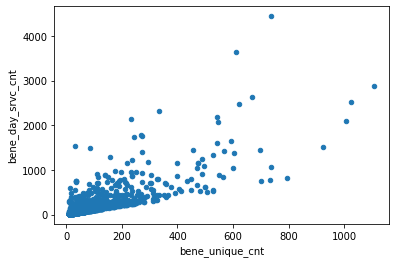

In [18]:
merged_dataset.plot(kind='scatter', x='bene_unique_cnt', y='bene_day_srvc_cnt')

In [19]:
# calculating the total number of people in the merged_dataset

merged_dataset.nunique()

npi                              190
nppes_provider_gender              2
provider_type                     39
line_srvc_cnt                    471
bene_unique_cnt                  282
bene_day_srvc_cnt                425
average_submitted_chrg_amt      1026
average_Medicare_allowed_amt    1589
average_Medicare_payment_amt    1749
NPI                              190
dtype: int64

In [20]:
merged_dataset['nppes_provider_gender'].describe()

count     1815
unique       2
top          M
freq      1724
Name: nppes_provider_gender, dtype: object

In [21]:
provider_df['nppes_provider_gender'].describe()

count     9416125
unique          2
top             M
freq      6535107
Name: nppes_provider_gender, dtype: object

In [22]:
1724/1815 ### percentage of males in excluded/convicted dataset

0.949862258953168

In [23]:
6535107/9416125 ### percentage of males in provider dataset

0.6940335860027347

In [24]:
print(merged_dataset.columns)

Index(['npi', 'nppes_provider_gender', 'provider_type', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_submitted_chrg_amt',
       'average_Medicare_allowed_amt', 'average_Medicare_payment_amt', 'NPI'],
      dtype='object')


In [25]:
### Looking for differences in NPI values in two datasets

comparison = merged_dataset['npi'] == merged_dataset['NPI']

comparison.nunique()

1

Since they are the same, we can drop one of these two columns. 

In [26]:
merged_dataset = merged_dataset.drop('NPI', axis=1)
merged_dataset.head(10)

,npi,nppes_provider_gender,provider_type,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt
0,1.003128e+09,M,Internal Medicine,617.0,499.0,617.0,332.463533,219.944716,170.918590
1,1.003128e+09,M,Internal Medicine,249.0,17.0,249.0,69.899598,42.570080,33.024418
2,1.003128e+09,M,Internal Medicine,1220.0,235.0,1220.0,120.000000,78.414213,61.340197
3,1.003128e+09,M,Internal Medicine,754.0,434.0,754.0,172.590186,113.284987,88.611313
4,1.003128e+09,M,Internal Medicine,543.0,448.0,543.0,188.176796,117.852320,91.907495
5,1.003128e+09,M,Internal Medicine,414.0,316.0,414.0,273.828502,181.887440,139.755266
6,1.003128e+09,M,Internal Medicine,658.0,218.0,658.0,141.793313,100.259909,77.022340
7,1.003128e+09,M,Internal Medicine,52.0,51.0,52.0,90.000000,60.180000,47.180000
8,1.003811e+09,M,Pain Management,90.0,32.0,90.0,105.000000,84.290000,53.103444
9,1.003811e+09,M,Pain Management,126.0,46.0,126.0,130.000000,123.460000,83.113968


In [27]:
merged_dataset.shape

(1815, 9)

In [28]:
selected_provider_data.dtypes

npi                               int64
nppes_provider_gender            object
provider_type                    object
line_srvc_cnt                   float64
bene_unique_cnt                 float64
bene_day_srvc_cnt               float64
average_submitted_chrg_amt      float64
average_Medicare_allowed_amt    float64
average_Medicare_payment_amt    float64
dtype: object

Applying same transformations to labeled dataset.

merged_dataset['nppes_provider_gender'] = le.fit_transform(merged_dataset['nppes_provider_gender'])
merged_dataset['provider_type'] = le.fit_transform(merged_dataset['provider_type'])

labeled_dataset = one_hot_encoder.fit_transform(merged_dataset)

### Converting sparse matrix back to DataFrame

from scipy import sparse

final_provider_df = pd.DataFrame.sparse.from_spmatrix(final_provider_dataset)

#labeled_dataset = pd.DataFrame(labeled_dataset.todense())

#print(labeled_dataset.shape)

print(final_provider_dataset.shape)


### Fraud and non-fraud labels

One extra feature needs to be created to label the npi as fraudulent or non-fraudulent. 

In [29]:
merged_dataset.npi = merged_dataset.npi.astype(int)

In [30]:
type(merged_dataset)

pandas.core.frame.DataFrame

In [31]:
type(selected_provider_data)

pandas.core.frame.DataFrame

### Adding a feature for fraud labeling

In [32]:
merged_dataset['label'] = 1

In [33]:
labeled_final = pd.merge(selected_provider_data, merged_dataset[['npi', 'label']], 
                        how='left', on='npi').fillna(0)


In [34]:
labeled_final.head()

,npi,nppes_provider_gender,provider_type,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt,label
0,1003000126,M,Internal Medicine,100.0,96.0,100.0,325.780000,73.398800,56.827200,0.0
1,1003000126,M,Internal Medicine,26.0,25.0,26.0,449.000000,100.080000,78.460000,0.0
2,1003000126,M,Internal Medicine,52.0,51.0,52.0,614.000000,136.380000,102.807692,0.0
3,1003000126,M,Internal Medicine,59.0,59.0,59.0,755.932203,190.363729,141.293559,0.0
4,1003000126,M,Internal Medicine,16.0,16.0,16.0,462.812500,101.680000,79.710000,0.0


In [35]:
labeled_final.shape

(9449787, 10)

In [36]:
labeled_final.dtypes


npi                               int64
nppes_provider_gender            object
provider_type                    object
line_srvc_cnt                   float64
bene_unique_cnt                 float64
bene_day_srvc_cnt               float64
average_submitted_chrg_amt      float64
average_Medicare_allowed_amt    float64
average_Medicare_payment_amt    float64
label                           float64
dtype: object

In [37]:
labeled_final['label'].describe()

count    9.449787e+06
mean     3.753418e-03
std      6.115006e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: label, dtype: float64

In [38]:
labeled_final.columns

Index(['npi', 'nppes_provider_gender', 'provider_type', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_submitted_chrg_amt',
       'average_Medicare_allowed_amt', 'average_Medicare_payment_amt',
       'label'],
      dtype='object')

### Splitting the data into train and test datasets. 

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(labeled_final[['npi', 'nppes_provider_gender', 'provider_type', 
                                   'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt', 
                                   'average_submitted_chrg_amt','average_Medicare_allowed_amt',
                                   'average_Medicare_payment_amt']], labeled_final['label'],
                                    random_state=0)
 
    


In [108]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (7087340, 9)
y_train shape: (7087340,)


In [109]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (2362447, 9)
y_test shape: (2362447,)


### Removing npi feature as it is not required in training the model. 

In [123]:
X_train = X_train.iloc[:, 1:]

In [43]:
X_train.head()

,nppes_provider_gender,provider_type,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt
1169916,F,Dermatology,26.0,26.0,26.0,122.0000,79.350000,41.471923
2925048,F,Radiation Oncology,176.0,49.0,176.0,505.0000,187.230000,146.780000
2006807,M,Neurology,320.0,170.0,320.0,128.0125,79.861656,62.125813
8486466,M,Family Practice,53.0,51.0,53.0,55.0000,18.680000,12.982642
1491221,M,Cardiology,20.0,20.0,20.0,30.0000,14.720000,11.540000


In [44]:
# selecting the categorical features

cat_features = labeled_final.select_dtypes(include=[object])

cat_features.head()

,nppes_provider_gender,provider_type
0,M,Internal Medicine
1,M,Internal Medicine
2,M,Internal Medicine
3,M,Internal Medicine
4,M,Internal Medicine


In [45]:
X_train['provider_type'].nunique()

88

### Label encoding categorical str features followed by one hot encoding. This results in a sparse matrix scipy object. LabelBinarizer can be used to combine the transformations by two encoders.

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# use when different features need different preprocessing
from sklearn.compose import make_column_transformer

# column_transformer pipeline
column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False), ['nppes_provider_gender', 'provider_type']),
    remainder='passthrough')

X_train = column_trans.fit_transform(X_train)


#le = LabelEncoder()
#lb = LabelBinarizer()

#X_train['nppes_provider_gender'] = lb.fit_transform(X_train['nppes_provider_gender'])
#X_train['provider_type'] = lb.fit_transform(X_train['provider_type'])


#one_hot_encoder = OneHotEncoder(categorical_features=[0, 1])
#one_hot_encoder = OneHotEncoder()
#X_train = one_hot_encoder.fit_transform(X_train['nppes_provider_gender'])
#X_train = one_hot_encoder.fit_transform(X_train['provider_type'])

In [125]:
X_train.shape

(7087340, 96)

To apply the encoder on all the columns in the DF.

df.apply(le.fit_transform)

### ColumnTransformer
To transform categorical and numerical attributes at the same time. 

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

### Custom Encoder Class

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### https://blog.cambridgespark.com/robust-one-hot-encoding-in-python-3e29bfcec77e



### For each categorical column
### We fit a label encoder, transform our column and 
### add it to our new dataframe
label_encoders = {}
for col in cat_columns:
    print("Encoding {}".format(col))
    new_le = LabelEncoder()
    df_processed[col] = new_le.fit_transform(df[col])
    label_encoders[col] = new_le

Unfortunately, the one hot encoder does not support passing the list of categorical features by their names but only by their indexes, so let’s get a new list, now with indexes. We can use the get_loc method to get the index of each of our categorical columns:

cat_columns_idx = [df_processed.columns.get_loc(col) 
                   for col in cat_columns]
                   
We’ll need to specify handle_unknown as ignore so the OneHotEncoder can work later on with our unseen data.

### Converting sparse matrix or ndarray back to DataFrame

In [126]:
X_train = pd.DataFrame(X_train)

print(X_train.shape)

(7087340, 96)


In [49]:
y_train.sum()

26703.0

### Finally, the dataset is ready for the model. Hurray...

### Creating a pipeline

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

log_reg = LogisticRegression()

pipe = (column_trans, log_reg)


#lr_fitting = pipe(X_train, y_train)

In [51]:
# cross-validate the entire process
# thus, preprocessing occurs within each fold of cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9962273575137358

In [60]:
### log_reg.predict(X_train)

In [131]:
type(X_test)

numpy.ndarray

In [61]:
### lr_fitting.score(X_train, y_train)

In [56]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV(cv=5, random_state=0)
lr_cv_fitting = lr_cv.fit(X_train, y_train)

In [57]:
lr_cv_fitting.score(X_train,y_train)

0.9962286273834753

In [127]:
X_test = X_test.iloc[:, 1:]

In [128]:
# column_transformer pipeline applied on test data
X_test = column_trans.transform(X_test)



In [132]:
X_test = pd.DataFrame(X_test)

In [ ]:
### To make sure that X_test has same number of features after OHE as X_train, an inner join is performed.

X_train_final, X_test_final = X_train.align(X_test, join='inner', axis=1)  # inner join

In [133]:
X_test.shape

(2362447, 96)

In [134]:
y_predicted = lr_cv_fitting.predict(X_test)

In [135]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predicted))

0.9962864775379088


In [147]:
y_predicted.shape

(2362447,)

In [137]:
### classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2353681
         1.0       0.00      0.00      0.00      8766

    accuracy                           1.00   2362447
   macro avg       0.50      0.50      0.50   2362447
weighted avg       0.99      1.00      0.99   2362447



In [138]:
### precision_recall_curve

from sklearn.metrics import precision_recall_curve

print(precision_recall_curve(y_test, y_predicted))

(array([0.00371056, 0.        , 1.        ]), array([1., 0., 0.]), array([0., 1.]))


In [139]:
### confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[2353674,       7],
       [   8766,       0]])

In [155]:
### probability of predicting y

y_predicted_prob = lr_cv_fitting.predict_proba(X_test)[:, 1]

In [156]:
print(y_predicted_prob)



[0.0050498  0.00152872 0.00094499 ... 0.00437183 0.0040465  0.00072321]


In [157]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob)

In [166]:
thresholds.shape

(18033,)

No handles with labels found to put in legend.


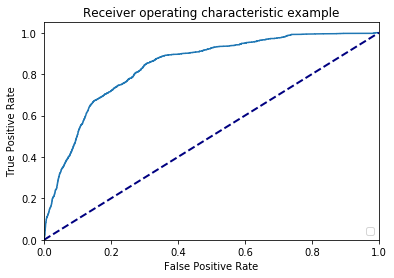

In [167]:
plt.figure()
lw_1 = 2
plt.plot(fpr, tpr)
#         lw=lw_1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [168]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_predicted_prob))

0.8390905843933215


X_test['nppes_provider_gender'] = le.fit_transform(X_test['nppes_provider_gender'])
X_test['provider_type'] = le.fit_transform(X_test['provider_type'])


one_hot_encoder = OneHotEncoder(categorical_features=[0, 1])
X_test = one_hot_encoder.fit_transform(X_test)

X_test = pd.DataFrame.sparse.from_spmatrix(X_test)

print(X_test.shape)

In [ ]:
### Most likely the train test split should happen before the one hot encoding.

# lr_cv_fitting.score(X_test, y_test)

### Cross-validation needs to be applied for logit regression. 

## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

lf = RandomForestClassifier(max_depth=2, random_state=0)

#clf.fit(X_train, y_train)


# cross-validate the entire process
# thus, preprocessing occurs within each fold of cross-validation

cross_val_score(lf, X_train, y_train, cv=5, scoring='accuracy').mean()

### Gradient Boosted Trees

from sklearn import ensemble

### Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf_gbt = ensemble.GradientBoostingClassifier(**params)

clf_gbt.fit(X_train, y_train)


In [ ]:
#from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(y_test, clf_gbt.predict(X_test))

#print("MSE: %.4f" % mse)